In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import random
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.stats import power
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import statsmodels.stats.multicomp as mc
from statsmodels.stats.weightstats import ztest as ztest

### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed.

### Note: 
1) Perform all the Statistical analysis with 5% (Significance level). 

2) Assume all the features are normally distributed and have equal variance.


In [2]:
# import the dataset
df1 = pd.read_csv('fifa_stats.csv')
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

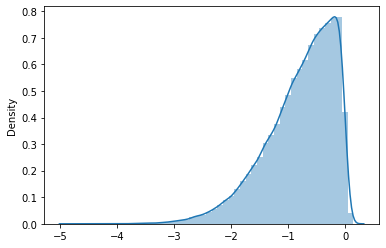

In [39]:
pop = stats.skewnorm.rvs(a=-20, size = 100000, random_state = 0)
sns.distplot(pop)
plt.show()

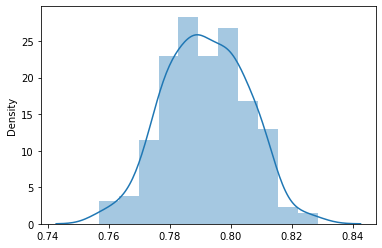

In [10]:
sample_size = len(df1['Age'])
no_of_sample = 200
sample_mean_list = []
for i in range(no_of_sample):
    
    sample = np.random.choice(pop, size = sample_size, replace = False)
    sample_mean = np.mean(sample)
    sample_mean_list.append(sample_mean)
sns.distplot(sample_mean_list)
plt.show()

In [11]:
mean = df1['Age'].mean()
std = df1['Age'].std()
n = 200
alpha = 0.05
z_alpha_by_2 = stats.norm.isf(q = alpha/2)
error = (z_alpha_by_2 * std) / (np.sqrt(n))
print('Standard error:', round(error,4))

Standard error: 0.5348


#### b) Is there any evidence that the players overall rating is greater than 80?

 H0 : Overall Rating <= 80 Ha : Overall Rating > 80

In [12]:
z_critical = round(stats.norm.isf(q = 0.95),2)
z_calc, z_calc1 = stests.ztest(x1 = df1['Overall_rating'], value = 80, alternative =
'smaller')
z_calc < z_critical

True

#Reject null hypothesis. There is enough evidence that the players overall rating is greater than 80


#### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform thegraphical analysis.

In [13]:
right = df1[(df1['Preferred Foot'] == 'Right')]['Potential']
n_r = len(right)
avg_r = np.mean(right)
std_r = statistics.stdev(right)
left = df1[(df1['Preferred Foot'] == 'Left')]['Potential']
n_l = len(left)
avg_l = np.mean(left)
std_l = statistics.stdev(left)
dof=n_r+n_l-2

In [14]:
# Shapiro test
# H0: Data is normally distributed
# Ha: Data is not normally distributed
stat, p_value = shapiro(df1['Potential'])
p_value < 0.05

True

#Data is not normally distributed. let's assume that data is normally distributed.

In [15]:
# Levene test
# H0: Variances are equal
# Ha: Variances are not equal
stat_l,p_value_l = stats.levene(right,left)
p_value_l < 0.05

False

In [16]:
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = dof), 2))
t_stat, p_val = stats.ttest_ind(a = right, b = left)
t_val,t_stat

(1.96, -1.5378037422592814)

In [17]:
# The null and alternative hypothesis is
# H0: u1 - u2 = 0
# Ha: u1 - u2 != 0
t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = dof), 2))
t_stat, p_val = stats.ttest_ind(a = right, b = left)
t_val, t_stat, p_val

(1.96, -1.5378037422592814, 0.12425494914461453)

We can see that the test statistic value is less than 1.96 and greater than -1.96, the p-value is greater than 0.05. Thus
we reject the null hypothesis and conclude that the preferred foot does not have any impact on the potential.

<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

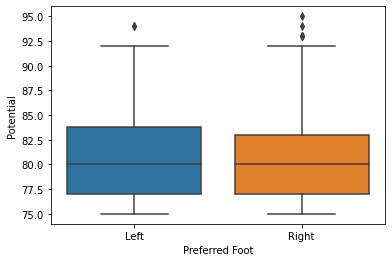

In [18]:
sns.boxplot(df1['Preferred Foot'] ,df1['Potential'])

From the graph it can be seen that Potential of Left foot and Right foot are almost equal. Thus it can be further
concluded that preferred foot doesn't impact potential

#### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both arecontinuous data points].

In [19]:
# Ho : There is no relation between the overall rating and potential.
# Ha : There is a relation between the overall rating and potential
# Aplha = 0.05

In [20]:
stats.ttest_ind(df1['Overall_rating'], df1['Potential'])

Ttest_indResult(statistic=-17.89175319557915, pvalue=6.241604310936382e-69)

In [21]:
#  Hence P-Value is lesser than alpha , there here we reject null hypothesis

# Conclusion : There is a relation between the overall rating and potential

#### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statisticalanalysis

In [22]:
df1.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [23]:
df1['Overall_rating'].head(5)


0    94
1    94
2    92
3    91
4    91
Name: Overall_rating, dtype: int64

In [24]:
df1['Skill Moves'] = df1['Skill Moves'].astype('object')

In [25]:
df1['Skill Moves'].unique()


array([4, 5, 1, 3, 2], dtype=object)

In [26]:
g1= df1[df1['Skill Moves'] == '1']['Overall_rating']
g2 = df1[df1['Skill Moves'] == '2']['Overall_rating']
g3 = df1[df1['Skill Moves'] == '3']['Overall_rating']
g4 = df1[df1['Skill Moves'] == '4']['Overall_rating']
g5 = df1[df1['Skill Moves'] == '5']['Overall_rating']
print(shapiro(df1['Overall_rating']))

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)


In [27]:
1.0221183102662362e-39 > 0.01

False

In [28]:
s,p = stats.levene(g1,g2,g3,g4,g5)
p > 0.01

False

### 2. Perform the following statistical analysis on the mobile network dataset given. The givendata set contains information about the internet, calls, messages of various network. DataCleaning and basic EDA process needs to be performed.

### Note:
1) Perform all the Statistical analysis with 5%(Significance level).

2) Perform the test of normality and test of variance in the appropriate places.

In [29]:
# import the dataset
df2 = pd.read_csv('phone.csv')
df2.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all thenetwork. Which of the Intervals are wider? Interpret the results.

In [30]:
n = len(df2['duration'])
avg = df2['duration'].mean()
std = df2['duration'].std()
interval95 = stats.norm.interval(0.95, loc = avg, scale = std/np.sqrt(n))
print('For 95% confidence interval the range estimate is', np.round(interval95,2))
interval99 = stats.norm.interval(0.99, loc = avg, scale = std/np.sqrt(n))
print('for 99% confidence interval the range estimate is', np.round(interval99,2))

For 95% confidence interval the range estimate is [141.18 147.43]
for 99% confidence interval the range estimate is [140.2  148.41]


In [31]:
print(interval95[1] - interval95[0])
print(interval99[1] - interval99[0])


6.2541916620104985
8.219401111494562


#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset

In [32]:
# Chi Square Critical Value
stats.chi.ppf(0.95, 4)

3.080215745168048

In [33]:
freq = df2['network'].value_counts().tolist()

network = df2['network'].unique().tolist()
Users = freq                            # Observed Values
exp_freq = np.sum(Users)/len(network)



In [34]:
teststats = np.sum((Users-exp_freq)**2)/exp_freq
print(teststats)

# If the Test Statistic > Critical Value, Then We Reject the Ho.
# If the Test Statistic < Critical Value, Then We Fail to Reject the Ho.
# As per the Rule We Reject the Ho meaning that the Count of networks are not equally distributed.

307.409756097561


#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results fromthe graph.

<AxesSubplot:xlabel='network', ylabel='duration'>

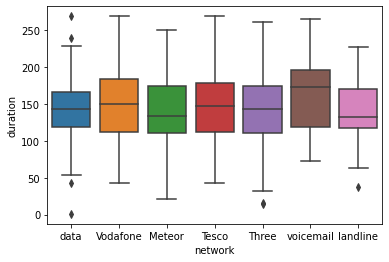

In [35]:
sns.boxplot(df2['network'] ,df2['duration'])

In [36]:
# Vodafone has higher duration distribution with range between 50 and 250 
# and landline has lowest duration distribution with range between 60 and 230

#### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relationbetween the classes is required.

In [74]:
# f_oneway() function takes the group data as input and
# returns F_statistics and P-value
from scipy.stats import f_oneway

# running the one-way anova test between  item and duration 
# assumption (Ho) is that item and duration are not correlated

# finds out the prices data for each FuelType as a list
CategoryGroupLists=df2.groupby('item')['duration'].apply(list)
# performing the annova test
AnovaResults=f_oneway(*CategoryGroupLists)
print("P-value for anova is:",AnovaResults[1])
# we accept the assumption(Ho) only when P-value >0.05

P-value for anova is: 0.1456068656611744


In [ ]:
# Hence we accept the assumption that item and duration are related

#### e) Perform statistical tests to identify the relation between network and network_type.

In [64]:
new_df = df2[['network','network_type']].copy()
new_df.head()

,network,network_type
0,data,data
1,Vodafone,mobile
2,Meteor,mobile
3,Tesco,mobile
4,Tesco,mobile


In [69]:
# cross tabulation between network and network_type
CrosstabResult=pd.crosstab(index=new_df['network'],columns=new_df['network_type'])
print(CrosstabResult)

network_type  data  landline  mobile  voicemail
network                                        
Meteor           0         0      87          0
Tesco            0         0      84          0
Three            0         0     215          0
Vodafone         0         0     215          0
data           150         0       0          0
landline         0        42       0          0
voicemail        0         0       0         27


In [72]:
# importing the required function
from scipy.stats import chi2_contingency
# performing chi-sq test
ChiSqResult=chi2_contingency(CrosstabResult)

# p-value is the probability of Ho being True
# if- P- value >0.05 then only we accept the assumption (Ho)
print("The p-value of the ChiSq Test is:",ChiSqResult[1])

The p-value of the ChiSq Test is: 0.0


In [ ]:
# we are fail to accept the assumption because p-value<0.05